---
title: GSB - S544 Lab 8
author: Karissa Mohr
format:
  html:
    embed-resources: true
echo: true
theme: lux
---

# Lab 8: Linear Classifiers
## The Data
This week, we consider a dataset generated from text data.

The original dataset can be found here: https://www.kaggle.com/datasets/kingburrito666/cannabis-strains. It consists of user reviews of different strains of cannabis. Users rated their experience with the cannabis strain on a scale of 1 to 5. They also selected words from a long list to describe the Effects and the Flavor of the cannabis.

In the dataset linked above, each row is one strain of cannabis. The average rating of all testers is reported, as well as the most commonly used words for the effect and flavor.

Some data cleaning has been performed for you: The Effect and Flavor columns have been converted to dummy variables indicating if the particular word was used for the particular strain.

This cleaned data can be found at: https://www.dropbox.com/s/s2a1uoiegitupjc/cannabis_full.csv

Our goal will be to fit models that identify the Sativa types from the Indica types, and then to fit models that also distinguish the Hybrid types.

IMPORTANT: In this assignment, you do not need to consider different feature sets. Normally, this would be a good thing to try - but for this homework, simply include all the predictors for every model.



In [17]:
import pandas as pd
import numpy as np

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score


In [32]:
url = "https://www.dropbox.com/s/s2a1uoiegitupjc/cannabis_full.csv?dl=1"
cannabis = pd.read_csv(url)
cannabis

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
cannabis.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Creative',
       'Energetic', 'Tingly', 'Euphoric', 'Relaxed', 'Aroused', 'Happy',
       'Uplifted', 'Hungry', 'Talkative', 'Giggly', 'Focused', 'Sleepy', 'Dry',
       'Mouth', 'Earthy', 'Sweet', 'Citrus', 'Flowery', 'Violet', 'Diesel',
       'Spicy/Herbal', 'Sage', 'Woody', 'Apricot', 'Grapefruit', 'Orange',
       'Pungent', 'Grape', 'Pine', 'Skunk', 'Berry', 'Pepper', 'Menthol',
       'Blue', 'Cheese', 'Chemical', 'Mango', 'Lemon', 'Peach', 'Vanilla',
       'Nutty', 'Chestnut', 'Tea', 'Tobacco', 'Tropical', 'Strawberry',
       'Blueberry', 'Mint', 'Apple', 'Honey', 'Lavender', 'Lime', 'Coffee',
       'Ammonia', 'Minty', 'Tree', 'Fruit', 'Butter', 'Pineapple', 'Tar',
       'Rose', 'Plum', 'Pear'],
      dtype='object')

## Part One: Binary Classification
Create a dataset that is limited only to the Sativa and Indica type cannabis strains.

This section asks you to create a final best model for each of the four new model types studied this week: LDA, QDA, SVC, and SVM. For SVM, you may limit yourself to only the polynomial kernel.

For each, you should:

* Choose a metric you will use to select your model, and briefly justify your choice. (Hint: There is no specific target category here, so this should not be a metric that only prioritizes one category.)

* Find the best model for predicting the Type variable. Don’t forget to tune any hyperparameters.

* Report the (cross-validated!) metric.

* Fit the final model.

* Output a confusion matrix.



In [33]:
cannabis["Type"] = cannabis["Type"].str.lower()

In [34]:
cannabis_1 = cannabis[(cannabis["Type"] == "indica") | (cannabis["Type"] == "sativa")]
cannabis_1

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3-Bears-Og,indica,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet",0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,Zeta-Sage,sativa,4.5,"Happy,Relaxed,Uplifted,Euphoric,Focused","Diesel,Pungent,Sage",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
X_1 = cannabis_1.drop(columns=["Strain", "Type", "Effects", "Flavor"], errors="ignore")
y_1 = cannabis_1["Type"]

X_1.shape, y_1.value_counts()

((1139, 65),
 Type
 indica    699
 sativa    440
 Name: count, dtype: int64)

In [37]:
X_1.shape, y_1.value_counts()

((1139, 65),
 Type
 indica    699
 sativa    440
 Name: count, dtype: int64)

In [38]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X_1, y_1, test_size=0.3, random_state=1, stratify=y_1
)

Q1: LDA

In [42]:
# LDA model
from sklearn.impute import SimpleImputer

lda_model = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scale", StandardScaler()),
    ("lda", LinearDiscriminantAnalysis())
])

In [43]:
lda_cv_accuracy = cross_val_score(
    lda_model, X1_train, y1_train, cv=5, scoring="accuracy"
).mean()

lda_cv_accuracy

np.float64(0.8432075471698113)

In [44]:
# Fit model
lda_fitted = lda_model.fit(X1_train, y1_train)
lda_pred = lda_fitted.predict(X1_test)

print(confusion_matrix(y1_test, lda_pred))
print(classification_report(y1_test, lda_pred))

[[181  29]
 [ 31 101]]
              precision    recall  f1-score   support

      indica       0.85      0.86      0.86       210
      sativa       0.78      0.77      0.77       132

    accuracy                           0.82       342
   macro avg       0.82      0.81      0.81       342
weighted avg       0.82      0.82      0.82       342



Q2: QDA

In [45]:
# QDA Model
qda_model = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scale", StandardScaler()),
    ("qda", QuadraticDiscriminantAnalysis())
])

In [46]:
qda_cv_accuracy = cross_val_score(
    qda_model, X1_train, y1_train, cv=5, scoring="accuracy"
).mean()

qda_cv_accuracy

/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

np.float64(0.5557783018867924)

In [47]:
qda_fitted = qda_model.fit(X1_train, y1_train)
qda_pred = qda_fitted.predict(X1_test)

print(confusion_matrix(y1_test, qda_pred))
print(classification_report(y1_test, qda_pred))

[[132  78]
 [ 45  87]]
              precision    recall  f1-score   support

      indica       0.75      0.63      0.68       210
      sativa       0.53      0.66      0.59       132

    accuracy                           0.64       342
   macro avg       0.64      0.64      0.63       342
weighted avg       0.66      0.64      0.64       342



/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Q3: SVC

In [48]:
# SVC Model
svc_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scale", StandardScaler()),
    ("svc", SVC(kernel="linear"))
])

In [49]:
svc_param_grid = {"svc__C": [0.01, 0.1, 1, 10, 100]}

svc_grid = GridSearchCV(
    svc_pipeline, svc_param_grid,
    cv=5, scoring="accuracy"
)

svc_grid.fit(X1_train, y1_train)

svc_grid.best_params_, svc_grid.best_score_

({'svc__C': 0.01}, np.float64(0.8507389937106918))

In [50]:
svc_best = svc_grid.best_estimator_
svc_pred = svc_best.predict(X1_test)

print(confusion_matrix(y1_test, svc_pred))
print(classification_report(y1_test, svc_pred))

[[188  22]
 [ 31 101]]
              precision    recall  f1-score   support

      indica       0.86      0.90      0.88       210
      sativa       0.82      0.77      0.79       132

    accuracy                           0.85       342
   macro avg       0.84      0.83      0.83       342
weighted avg       0.84      0.85      0.84       342



Q4: SVM

In [51]:
# SVM Model
svm_poly_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scale", StandardScaler()),
    ("svm", SVC(kernel="poly"))
])


In [52]:
svm_poly_param_grid = {
    "svm__C": [0.1, 1, 10],
    "svm__degree": [2, 3, 4]
}

svm_poly_grid = GridSearchCV(
    svm_poly_pipeline, svm_poly_param_grid,
    cv=5, scoring="accuracy"
)

svm_poly_grid.fit(X1_train, y1_train)

svm_poly_grid.best_params_, svm_poly_grid.best_score_

({'svm__C': 10, 'svm__degree': 3}, np.float64(0.8181367924528302))

In [53]:
svm_poly_best = svm_poly_grid.best_estimator_
svm_poly_pred = svm_poly_best.predict(X1_test)

print(confusion_matrix(y1_test, svm_poly_pred))
print(classification_report(y1_test, svm_poly_pred))

[[182  28]
 [ 37  95]]
              precision    recall  f1-score   support

      indica       0.83      0.87      0.85       210
      sativa       0.77      0.72      0.75       132

    accuracy                           0.81       342
   macro avg       0.80      0.79      0.80       342
weighted avg       0.81      0.81      0.81       342



In [54]:
# Compare Model Accuracies
print("LDA Accuracy:", lda_cv_accuracy)
print("QDA Accuracy:", qda_cv_accuracy)
print("SVC Accuracy:", svc_grid.best_score_)
print("SVM Accuracy:", svm_poly_grid.best_score_)

LDA Accuracy: 0.8432075471698113
QDA Accuracy: 0.5557783018867924
SVC Accuracy: 0.8507389937106918
SVM Accuracy: 0.8181367924528302


## Part Two: Natural Multiclass
Now use the full dataset, including the Hybrid strains.

In [57]:
cannabis_2 = cannabis.copy()

X_2 = cannabis_2.drop(columns=["Type", "Strain", "Effects", "Flavor"], errors="ignore")
y_2 = cannabis_2["Type"]

X_2.shape, y_2.value_counts()

((2351, 65),
 Type
 hybrid    1212
 indica     699
 sativa     440
 Name: count, dtype: int64)

In [58]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X_2, y_2, test_size=0.3, random_state=1, stratify=y_2
)

Q1:
Fit a decision tree, plot the final fit, and interpret the results.

In [59]:
# Decision Tree
tree_param_grid = {
    "max_depth": [2, 3, 4, 5, 6, None],
    "min_samples_leaf": [1, 5, 10]
}

tree_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=1),
    param_grid=tree_param_grid,
    cv=5,
    scoring="accuracy"
)

tree_grid.fit(X2_train, y2_train)

tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 3, 'min_samples_leaf': 1}, np.float64(0.625531914893617))

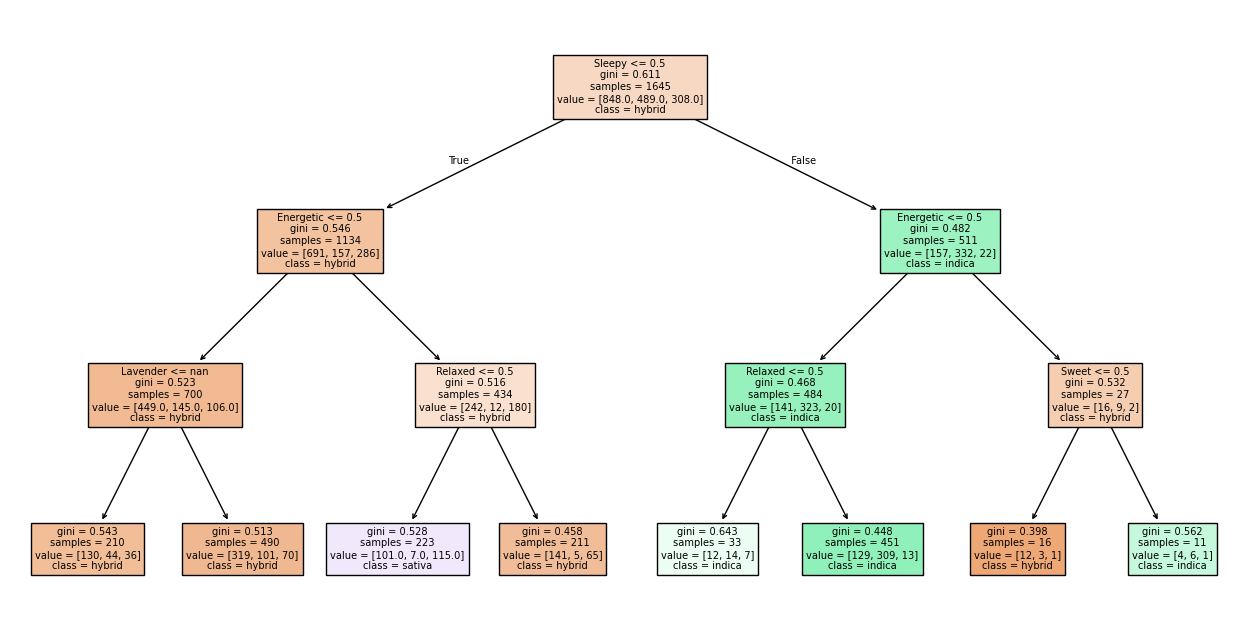

In [61]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# plot

best_tree = tree_grid.best_estimator_

plt.figure(figsize=(16,8))
plot_tree(
    best_tree,
    feature_names=X_2.columns,
    class_names=best_tree.classes_,
    filled=True,
    max_depth=3
)
plt.show()

Q2:
Repeat the analyses from Part One for LDA, QDA, and KNN.

In [62]:
# lda multiclass

lda_multi = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scale", StandardScaler()),
    ("lda", LinearDiscriminantAnalysis())
])

lda_multi_cv = cross_val_score(
    lda_multi, X2_train, y2_train, cv=5, scoring="accuracy"
).mean()

lda_multi_cv

np.float64(0.6224924012158055)

In [63]:
lda_multi_fitted = lda_multi.fit(X2_train, y2_train)
lda_multi_pred = lda_multi_fitted.predict(X2_test)

print(confusion_matrix(y2_test, lda_multi_pred))
print(classification_report(y2_test, lda_multi_pred))


[[250  83  31]
 [ 73 133   4]
 [ 78   5  49]]
              precision    recall  f1-score   support

      hybrid       0.62      0.69      0.65       364
      indica       0.60      0.63      0.62       210
      sativa       0.58      0.37      0.45       132

    accuracy                           0.61       706
   macro avg       0.60      0.56      0.57       706
weighted avg       0.61      0.61      0.61       706



In [64]:
# qda multiclass
qda_multi = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scale", StandardScaler()),
    ("qda", QuadraticDiscriminantAnalysis())
])

qda_multi_cv = cross_val_score(
    qda_multi, X2_train, y2_train, cv=5, scoring="accuracy"
).mean()

qda_multi_fitted = qda_multi.fit(X2_train, y2_train)
qda_multi_pred = qda_multi_fitted.predict(X2_test)

print(confusion_matrix(y2_test, qda_multi_pred))
print(classification_report(y2_test, qda_multi_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

[[124  87 153]
 [ 53  52 105]
 [ 37  29  66]]
              precision    recall  f1-score   support

      hybrid       0.58      0.34      0.43       364
      indica       0.31      0.25      0.28       210
      sativa       0.20      0.50      0.29       132

    accuracy                           0.34       706
   macro avg       0.36      0.36      0.33       706
weighted avg       0.43      0.34      0.36       706



/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

In [65]:
# knn multiclass
from sklearn.neighbors import KNeighborsClassifier

knn_multi = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scale", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

knn_multi_param_grid = {"knn__n_neighbors": [3, 5, 7, 9, 11]}

knn_grid = GridSearchCV(
    knn_multi,
    knn_multi_param_grid,
    cv=5,
    scoring="accuracy"
)

knn_grid.fit(X2_train, y2_train)

knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 11}, np.float64(0.5641337386018238))

Q3:
Were your metrics better or worse than in Part One? Why? Which categories were most likely to get mixed up, according to the confusion matrices? Why?

* The metrics were way worse in part 2 than they were in part 1, as all the accruacies computed were significantly lower. This is because binary guessing baseline accuracy is higher than three-class. Adding in a 3rd target creates overlap, making it harder to identify.
* The hybrid was the most likely to get mixed up according to the matrices, which makes sense because they are a mix of indica and sativa so they have similar effects to both sativa and indica

## Part Three: Multiclass from Binary
Consider two models designed for binary classification: SVC and Logistic Regression.



Q1:
Fit and report metrics for OvR versions of the models. That is, for each of the two model types, create three models:

* Indica vs. Not Indica

* Sativa vs. Not Sativa

* Hybrid vs. Not Hybrid



In [66]:
# binary target columns
y2_train_indica = (y2_train == "indica") * 1
y2_train_sativa = (y2_train == "sativa") * 1
y2_train_hybrid = (y2_train == "hybrid") * 1

y2_test_indica  = (y2_test == "indica") * 1
y2_test_sativa  = (y2_test == "sativa") * 1
y2_test_hybrid  = (y2_test == "hybrid") * 1

In [69]:
# logistic pipeline
logit_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scale", StandardScaler()),
    ("logit", LogisticRegression(max_iter=2000))
])

In [71]:
# logistic indica
logit_indica_cv = cross_val_score(
    logit_pipe, X2_train, y2_train_indica, cv=5, scoring="f1"
).mean()

logit_indica_fitted = logit_pipe.fit(X2_train, y2_train_indica)
logit_indica_pred = logit_indica_fitted.predict(X2_test)

logit_indica_test_f1 = f1_score(y2_test_indica, logit_indica_pred)


In [72]:
# logistic sativa
logit_sativa_cv = cross_val_score(
    logit_pipe, X2_train, y2_train_sativa, cv=5, scoring="f1"
).mean()

logit_sativa_fitted = logit_pipe.fit(X2_train, y2_train_sativa)
logit_sativa_pred = logit_sativa_fitted.predict(X2_test)

logit_sativa_test_f1 = f1_score(y2_test_sativa, logit_sativa_pred)



In [73]:
# logistic hybrid
logit_hybrid_cv = cross_val_score(
    logit_pipe, X2_train, y2_train_hybrid, cv=5, scoring="f1"
).mean()

logit_hybrid_fitted = logit_pipe.fit(X2_train, y2_train_hybrid)
logit_hybrid_pred = logit_hybrid_fitted.predict(X2_test)

logit_hybrid_test_f1 = f1_score(y2_test_hybrid, logit_hybrid_pred)

In [75]:
# svc pipeline
svc_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scale", StandardScaler()),
    ("svc", SVC(kernel="linear"))
])

In [76]:
svc_param_grid = {"svc__C": [0.01, 0.1, 1, 10]}

In [77]:
# indica svc
svc_indica_grid = GridSearchCV(
    svc_pipe, svc_param_grid, cv=5, scoring="f1"
)
svc_indica_grid.fit(X2_train, y2_train_indica)

svc_indica_pred = svc_indica_grid.best_estimator_.predict(X2_test)
svc_indica_test_f1 = f1_score(y2_test_indica, svc_indica_pred)

In [78]:
# sativa svc
svc_sativa_grid = GridSearchCV(
    svc_pipe, svc_param_grid, cv=5, scoring="f1"
)
svc_sativa_grid.fit(X2_train, y2_train_sativa)

svc_sativa_pred = svc_sativa_grid.best_estimator_.predict(X2_test)
svc_sativa_test_f1 = f1_score(y2_test_sativa, svc_sativa_pred)

In [79]:
# hybrid svc
svc_hybrid_grid = GridSearchCV(
    svc_pipe, svc_param_grid, cv=5, scoring="f1"
)
svc_hybrid_grid.fit(X2_train, y2_train_hybrid)

svc_hybrid_pred = svc_hybrid_grid.best_estimator_.predict(X2_test)
svc_hybrid_test_f1 = f1_score(y2_test_hybrid, svc_hybrid_pred)

Q2:
Which of the six models did the best job distinguishing the target category from the rest? Which did the worst? Does this make intuitive sense?

In [81]:
print("Logistic Regression OvR Results:")
print("Indica vs. Not Indica:")
print("CV F1:", logit_indica_cv)
print("Test F1:", logit_indica_test_f1)

print("Sativa vs. Not Sativa:")
print("CV F1:", logit_sativa_cv)
print("Test F1:", logit_sativa_test_f1)

print("Hybrid vs. Not Hybrid:")
print("CV F1:", logit_hybrid_cv)
print("Test F1:", logit_hybrid_test_f1)

Logistic Regression OvR Results:
Indica vs. Not Indica:
CV F1: 0.6385919184752659
Test F1: 0.5856079404466501
Sativa vs. Not Sativa:
CV F1: 0.3711632458382794
Test F1: 0.3769633507853403
Hybrid vs. Not Hybrid:
CV F1: 0.6603040721075961
Test F1: 0.6508563899868248


In [82]:
print("SVC OvR Results:")
print("Indica vs. Not Indica:")
print("Best C:", svc_indica_grid.best_params_)
print("CV F1:", svc_indica_grid.best_score_)
print("Test F1:", svc_indica_test_f1)

print("Sativa vs. Not Sativa:")
print("Best C:", svc_sativa_grid.best_params_)
print("CV F1:", svc_sativa_grid.best_score_)
print("Test F1:", svc_sativa_test_f1)

print("Hybrid vs. Not Hybrid:")
print("Best C:", svc_hybrid_grid.best_params_)
print("CV F1:", svc_hybrid_grid.best_score_)
print("Test F1:", svc_hybrid_test_f1)

SVC OvR Results:
Indica vs. Not Indica:
Best C: {'svc__C': 0.01}
CV F1: 0.6618898537841412
Test F1: 0.6203703703703703
Sativa vs. Not Sativa:
Best C: {'svc__C': 1}
CV F1: 0.08399403066069733
Test F1: 0.0
Hybrid vs. Not Hybrid:
Best C: {'svc__C': 0.01}
CV F1: 0.6853505815688761
Test F1: 0.66270783847981


* The best overall OvR model was the hybrid for both the logistic and svc models
* Second best was Indica
* Sativa was worst, indicating a failure because the test F score was a 0
* Hybrid is probably the best because there are the most hybrid observations total in the dataset, and it shares effects of both sativa and indica
* Indica was next best because it had more specific effects whereas sativa has a lot that are shared with hybrid

Q3:
Fit and report metrics for OvO versions of the models. That is, for each of the two model types, create three models:

* Indica vs. Sativa

* Indica vs. Hybrid

* Hybrid vs. Sativa



In [95]:
# Logistic: Indica vs Sativa
pair_1 = cannabis_2[cannabis_2["Type"].isin(["indica", "sativa"])]
X_p1 = pair_1.drop(columns=["Strain", "Type", "Effects", "Flavor"], errors="ignore")
y_p1 = (pair_1["Type"] == "indica") * 1

logit_p1_auc = cross_val_score(
    logit_pipe, X_p1, y_p1, cv=5, scoring="roc_auc"
).mean()

print("Indica vs Sativa ROC-AUC:", logit_p1_auc)

Indica vs Sativa ROC-AUC: 0.9164032864617397


In [90]:
# Logistic: Indica vs Hybrid
pair_2 = cannabis_2[cannabis_2["Type"].isin(["indica", "hybrid"])]
X_p2 = pair_2.drop(columns=["Strain", "Type", "Effects", "Flavor"], errors="ignore")
y_p2 = (pair_2["Type"] == "indica") * 1

logit_p2_auc = cross_val_score(
    logit_pipe, X_p2, y_p2, cv=5, scoring="roc_auc"
).mean()

print("Indica vs Hybrid ROC-AUC:", logit_p2_auc)

Indica vs Hybrid ROC-AUC: 0.7848429922815867


In [91]:
# Logistic: Sativa vs Hybrid
pair_3 = cannabis_2[cannabis_2["Type"].isin(["sativa", "hybrid"])]
X_p3 = pair_3.drop(columns=["Strain", "Type", "Effects", "Flavor"], errors="ignore")
y_p3 = (pair_3["Type"] == "sativa") * 1

logit_p3_auc = cross_val_score(
    logit_pipe, X_p3, y_p3, cv=5, scoring="roc_auc"
).mean()

print("Sativa vs Hybrid ROC-AUC:", logit_p3_auc)

Sativa vs Hybrid ROC-AUC: 0.7187775752628829


In [92]:
# SVC: Indica vs Sativa
svc_p1_auc = cross_val_score(
    svc_pipe, X_p1, y_p1, cv=5, scoring="roc_auc"
).mean()
print("Indica vs Sativa ROC-AUC:", svc_p1_auc)

Indica vs Sativa ROC-AUC: 0.9205250280295244


In [93]:
# SVC:  Indica vs Hybrid
svc_p2_auc = cross_val_score(
    svc_pipe, X_p2, y_p2, cv=5, scoring="roc_auc"
).mean()
print("Indica vs Hybrid ROC-AUC:", svc_p2_auc)

Indica vs Hybrid ROC-AUC: 0.758290858502144


In [96]:
# SVC: Sativa vs Hybrid
svc_p3_auc = cross_val_score(
    svc_pipe, X_p3, y_p3, cv=5, scoring="roc_auc"
).mean()
print("Sativa vs Hybrid ROC-AUC:", svc_p3_auc)

Sativa vs Hybrid ROC-AUC: 0.7139089857868555


Q4:
Which of the six models did the best job distinguishing at differentiating the two groups? Which did the worst? Does this make intuitive sense?

* Indica v Sativa did the best at differetiating between two different groups which makes sense because their effects are very different/opposite (Relaxed v Energetic)
* Sativa v Hybrid did the worst which makes sense because they overlap on a lot of effects, causing the ROC-AUC to be lower and less accurate

Q5:
Suppose you had simply input the full data, with three classes, into the LogisticRegression function. Would this have automatically taken an “OvO” approach or an “OvR” approach?

What about for SVC?



* Logistic Regression would automatically take an OvR approach because it's typically a linear classifier, so it can only really focus on one versus the restm making it OvR approach
* SVC would automatically do an OvO approach because it fits one SVC for every pair of classes, then combines these pairwise decisions into a final multiclass prediction

